In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import matplotlib.transforms as transforms
import matplotlib
import os

In [2]:
dname = os.getcwd() + '/data_loading/data_v2_quotes/'
dname

'c:\\Users\\Jirko\\Desktop\\Hip_Lab\\analysis_scripts/data_loading/data_v2_quotes/'

load the data

In [3]:
ACCURACY = np.load(dname + 'ACCURACY_New.npy')
acc_first_prop = np.load(dname + 'Acc_first_prop_New.npy')
acc_second_prop = np.load(dname + 'acc_second_prop_New.npy')
acc_third_prop = np.load(dname + 'acc_third_prop_New.npy')

check shape

In [4]:
n_sujs, n_blocs, n_trials = ACCURACY.shape
# ACCURACY.shape
acc_first_prop.shape
acc_second_prop.shape
# ACCURACY[0,:,:]

(49, 8, 16)

compute a subject-wise average

In [119]:
ACCURACY_M_SUJS = np.nanmean(ACCURACY, axis=2)
ACCURACY_M_SUJS.shape

# find low performers
low_indices = np.where(ACCURACY_M_SUJS[:,7] < .7)

low_indices


(array([10, 18, 19, 21, 22, 24, 28, 29, 34, 44, 46], dtype=int64),)

In [118]:
def plot_accuracy_indi(subj_means, fig_name, fig_title, chance_level=False):
    # Define figure
    fig, ax = plt.subplots(1, 1, figsize=(9, 4), dpi=300, facecolor='w')

    # Individual data
    for i in range(n_blocs*2, n_blocs*3):
        ax.plot(
            np.arange(n_blocs),
            subj_means[i,:]
        )
    if chance_level:
        ax.axhline(y=chance_level, color='r', linestyle='--' )
    # Aesthetics
    ax.set_title(fig_title, fontweight='bold')
    ax.set_ylim(0.3, 1.05)
    ax.set_xlabel('Block #')
    ax.set_ylabel('Accuracy')

    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    plt.tight_layout()
    # fig.savefig(fig_name)

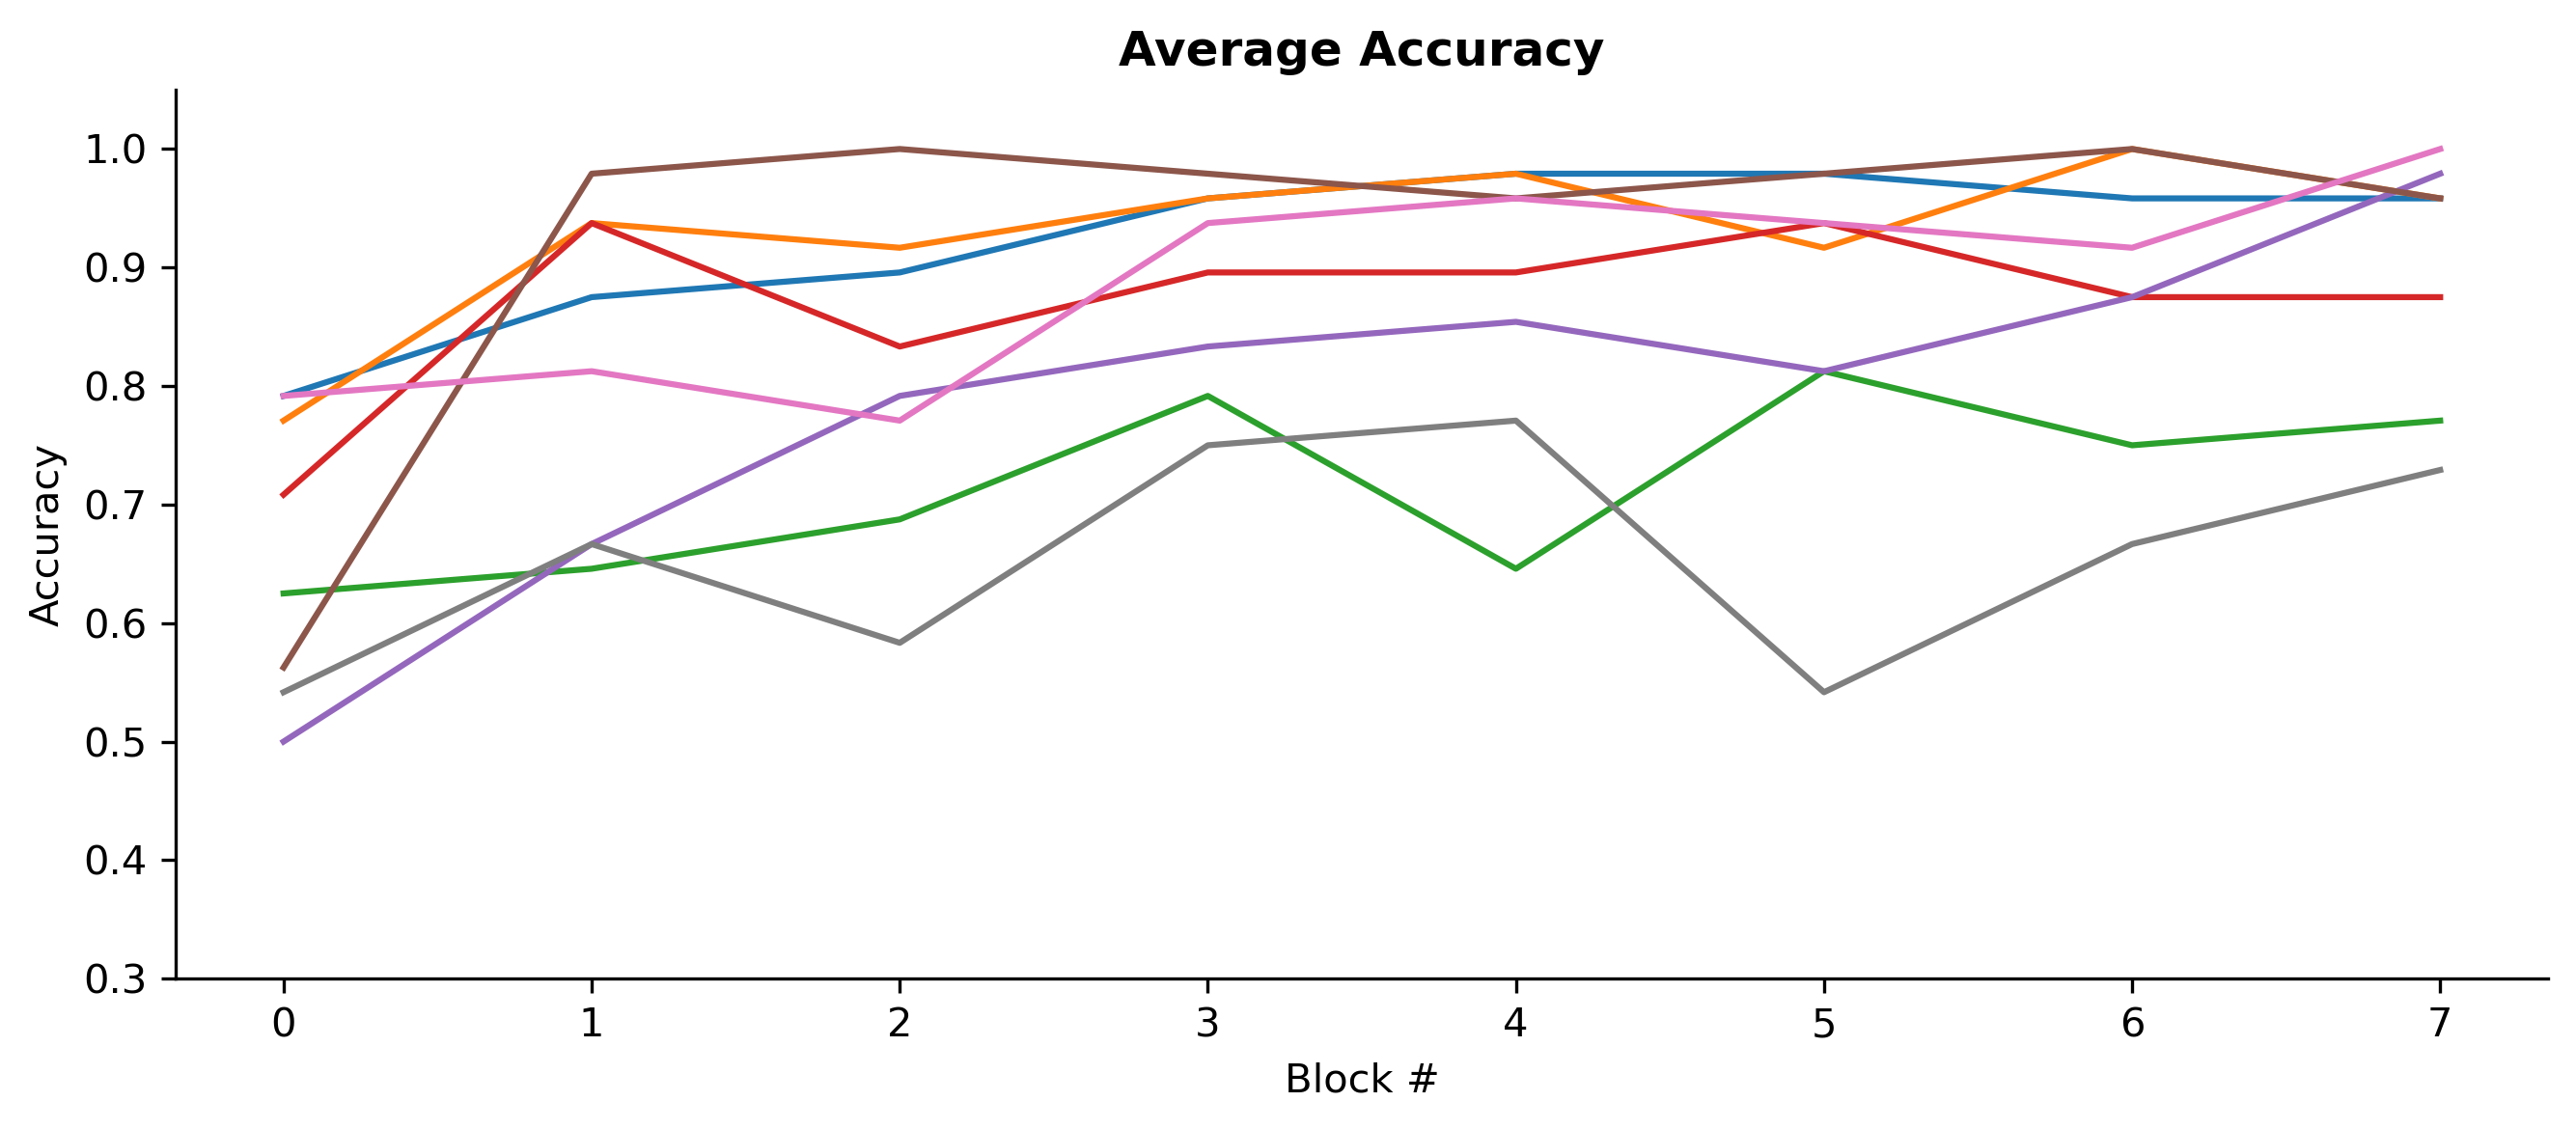

In [120]:
func_name = 'figures_new/fig_1_new_indi.svg'
fig_title = 'Average Accuracy'
ACCURACY_M_SUJS = np.delete(ACCURACY_M_SUJS, low_indices,0)
plot_accuracy_indi(ACCURACY_M_SUJS,func_name,fig_title)


for the first prop

In [121]:
subj_acc_first = np.nanmean(acc_first_prop, axis=2)
subj_acc_first = np.delete(subj_acc_first, low_indices,0)

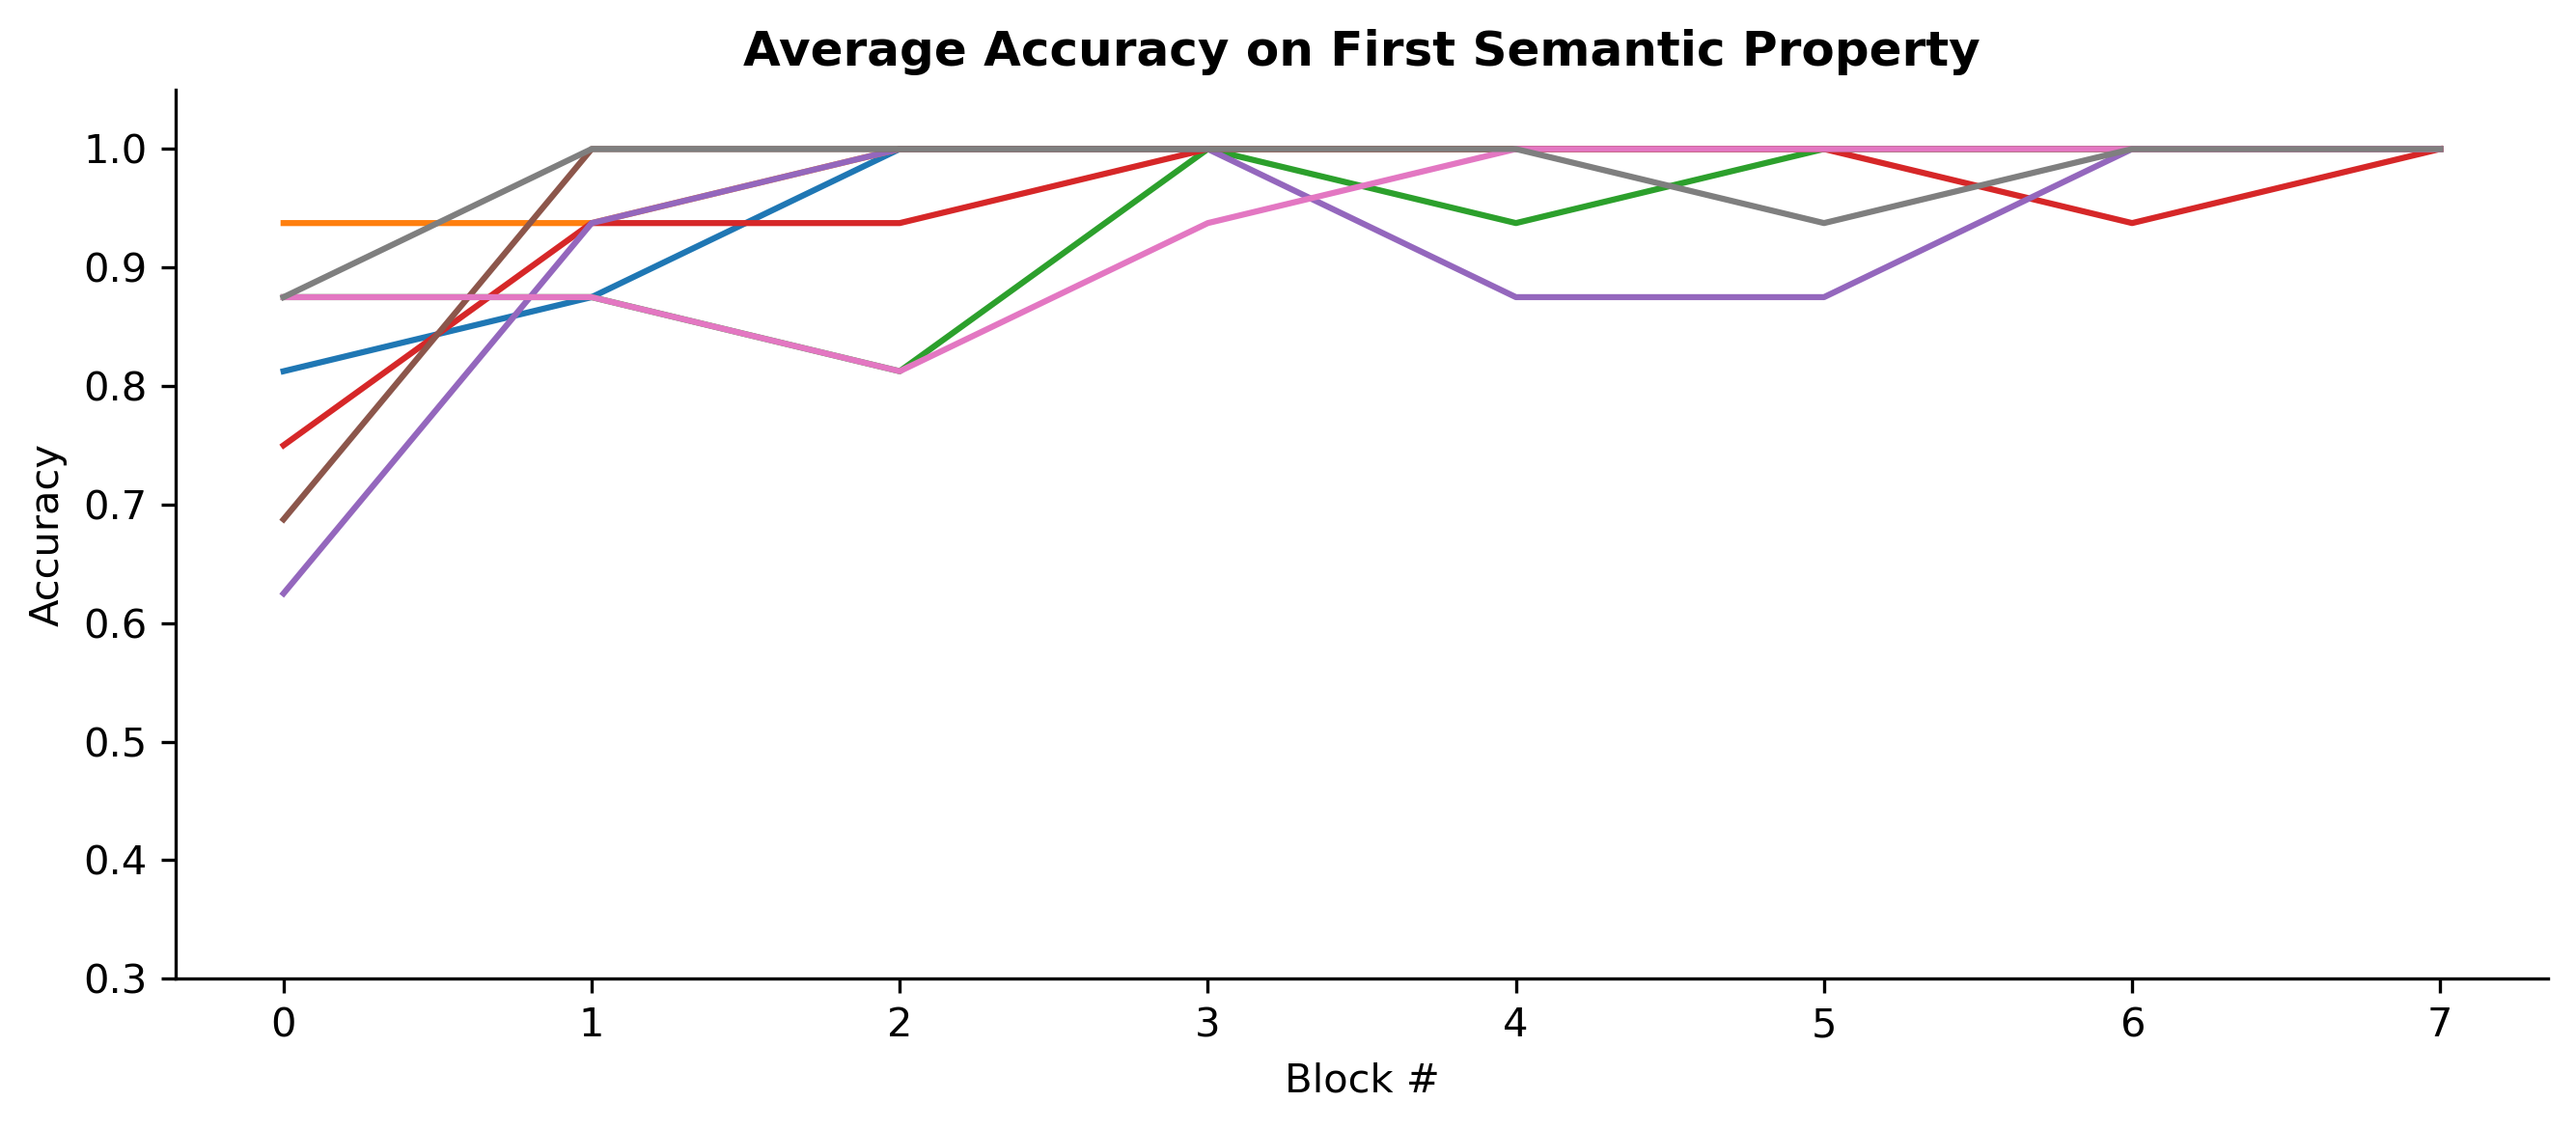

In [122]:
func_name = 'figures_new/fig_2_new_indi.svg'
fig_title = 'Average Accuracy on First Semantic Property'
plot_accuracy_indi(subj_acc_first, func_name, fig_title)

In [123]:
subj_acc_second = np.nanmean(acc_second_prop, axis=2)
subj_acc_second = np.delete(subj_acc_second, low_indices,0)

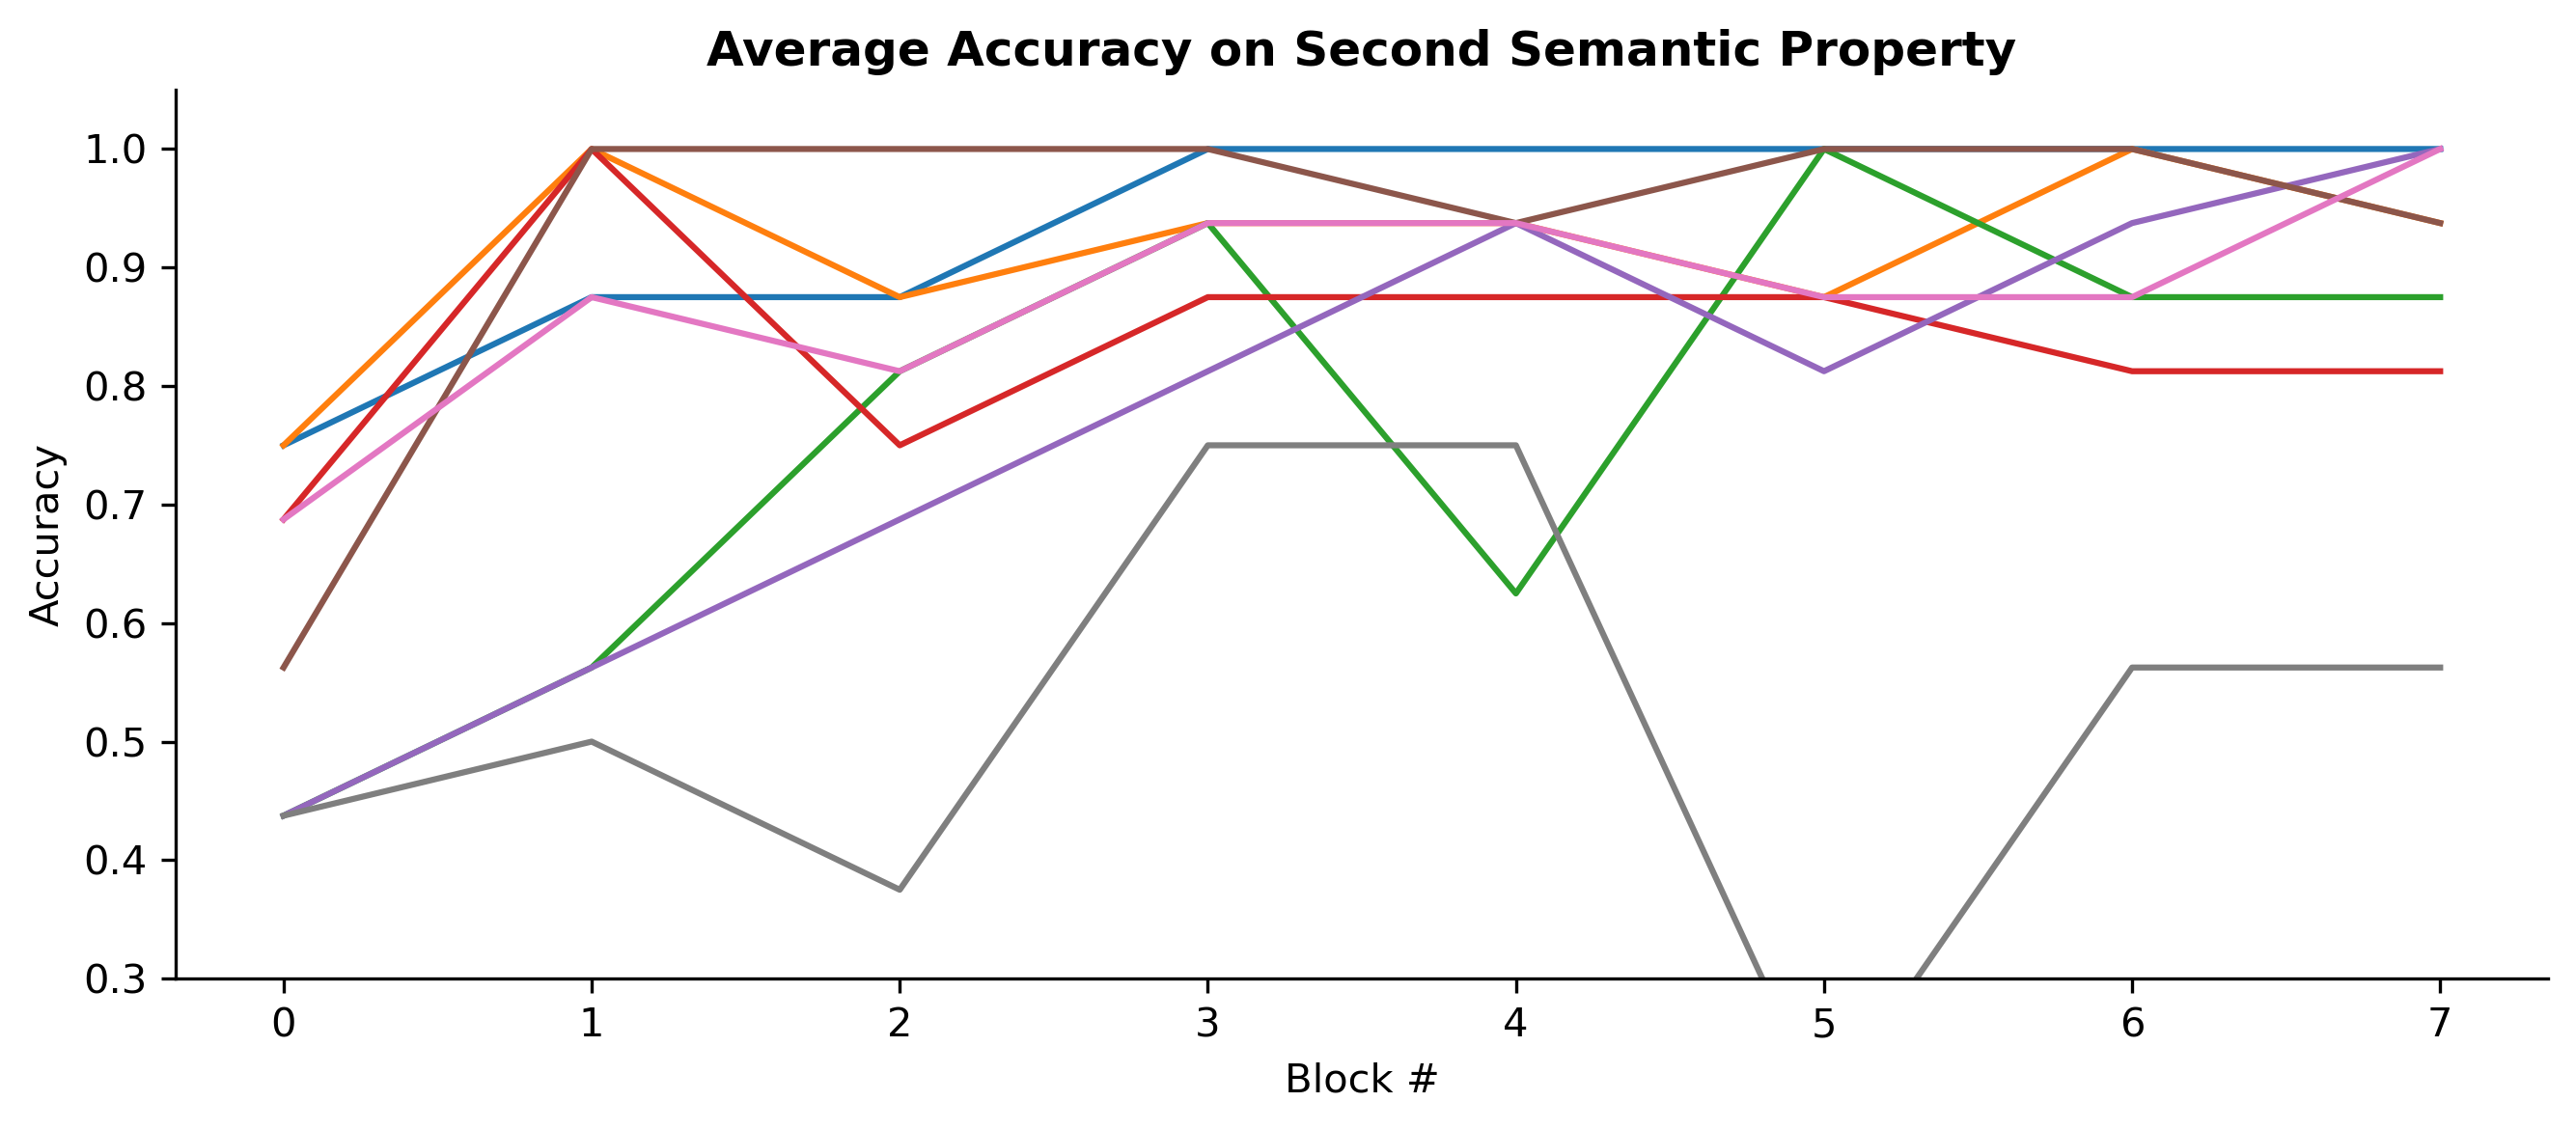

In [124]:
func_name = 'figures_new/fig_3_new_indi.svg'
fig_title = 'Average Accuracy on Second Semantic Property'
plot_accuracy_indi(subj_acc_second, func_name, fig_title)

In [127]:
subj_acc_third = np.nanmean(acc_third_prop, axis=2)
subj_acc_third = np.delete(subj_acc_third, low_indices,0)

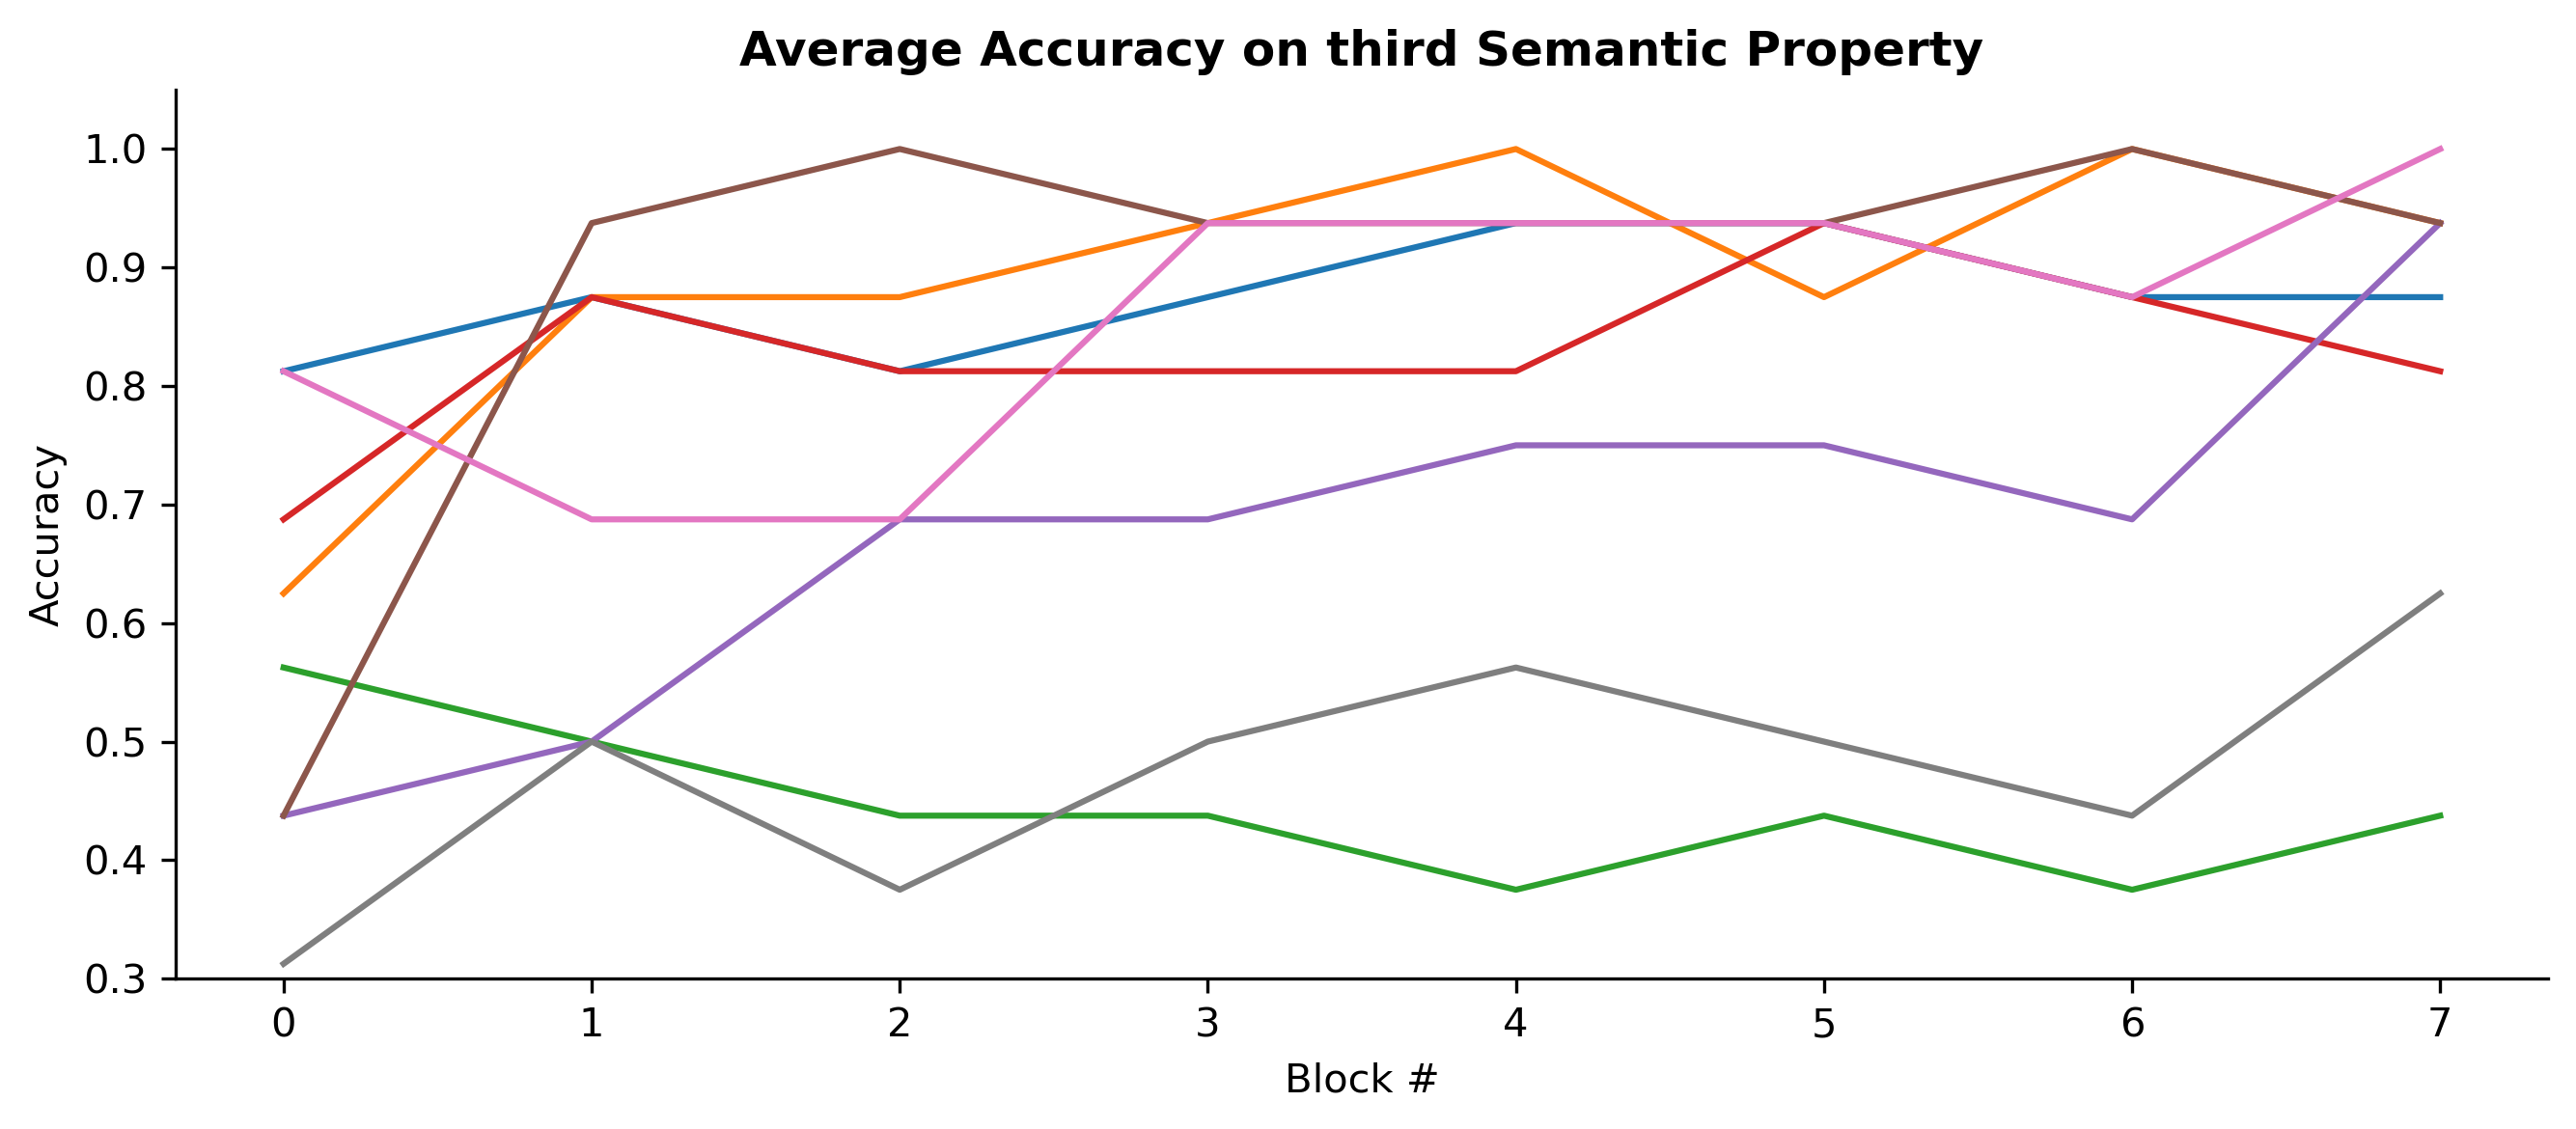

In [128]:
func_name = 'figures_new/fig_4_new_indi.svg'
fig_title = 'Average Accuracy on third Semantic Property'
plot_accuracy_indi(subj_acc_third, func_name, fig_title)